# New Section

In [ ]:
!pip install --upgrade jupyter_http_over_ws>=0.0.7

In [ ]:
jupyter serverextension enable --py jupyter_http_over_ws

SyntaxError: ignored

**dataset** : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/code

**download datasheet:**

In [ ]:
!wget --no-check-certificate \
  https://github.com/siramil/ML-SandalShoeBoot/raw/main/ShoeSandalBoot.zip \
  -O /tmp/ShoeSandalBoot.zip

--2023-05-23 08:10:01--  https://github.com/siramil/ML-SandalShoeBoot/raw/main/ShoeSandalBoot.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/siramil/ML-SandalShoeBoot/main/ShoeSandalBoot.zip [following]
--2023-05-23 08:10:01--  https://raw.githubusercontent.com/siramil/ML-SandalShoeBoot/main/ShoeSandalBoot.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49260786 (47M) [application/zip]
Saving to: ‘/tmp/ShoeSandalBoot.zip’

/tmp/ShoeSandalBoot 100%[===================>]  46.98M  --.-KB/s    in 0.1s    

2023-05-23 08:10:04 (441 MB/s) - ‘/tmp/ShoeSandalBoot.zip’ saved [49260786/492607

In [ ]:
import os
import zipfile
import tensorflow as tf

local_zip = '/tmp/ShoeSandalBoot.zip'
zip_ref  = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
base_dir = '/tmp/Shoe vs Sandal vs Boot Dataset'
image_gen = ImageDataGenerator(
    rescale= 1./255,                                                              # normalisasi data
    rotation_range = 20 ,                                                        # skenario image rotation 360 degree
    width_shift_range = 0.2,                                                      # "" pelebaran gambar sampai 0.2x
    height_shift_range = 0.2,                                                     # "" peninggian gambar sampai 0.2x
    zoom_range = 0.2,                                                             # "" zoom gambar sampai 0.2x
    horizontal_flip=True,                                                         # '' putar balik gambar secara horizontal
    fill_mode = 'nearest',                                                        # fill empty pixel with nearest pixel's value
    validation_split = 0.2                                                        # bagi data training 80%, validasi 20%

)              

In [ ]:
train_generator = image_gen.flow_from_directory (        
  base_dir,                                              
  target_size = (150,150),                         
  class_mode='categorical',
  batch_size = 64,                                      
  shuffle = True,                                       
  subset = 'training'                                   
)

valid_generator = image_gen.flow_from_directory (        
  base_dir,                                              
  target_size = (150,150),                                         
  class_mode='categorical',  
  batch_size = 64,                              
  shuffle = True,                                                              
  subset = 'validation'                                 
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [ ]:
base_dir_shoe = os.path.join(base_dir, 'Shoe')
base_dir_sandal = os.path.join(base_dir, 'Sandal')
base_dir_boot = os.path.join(base_dir, 'Boot')

list_dir_shoe = os.listdir(base_dir_shoe)
list_dir_sandal = os.listdir(base_dir_sandal)
list_dir_boot = os.listdir(base_dir_boot)
# Deletes all non-image files (there are two .db files bundled into the dataset)
!find //tmp/Shoe vs Sandal vs Boot Dataset/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(len(list_dir_shoe))
print(len(list_dir_sandal))
print(len(list_dir_boot))

find: ‘//tmp/Shoe’: No such file or directory
find: ‘vs’: No such file or directory
find: ‘Sandal’: No such file or directory
find: ‘vs’: No such file or directory
find: ‘Boot’: No such file or directory
find: ‘Dataset/’: No such file or directory
5000
5000
5000


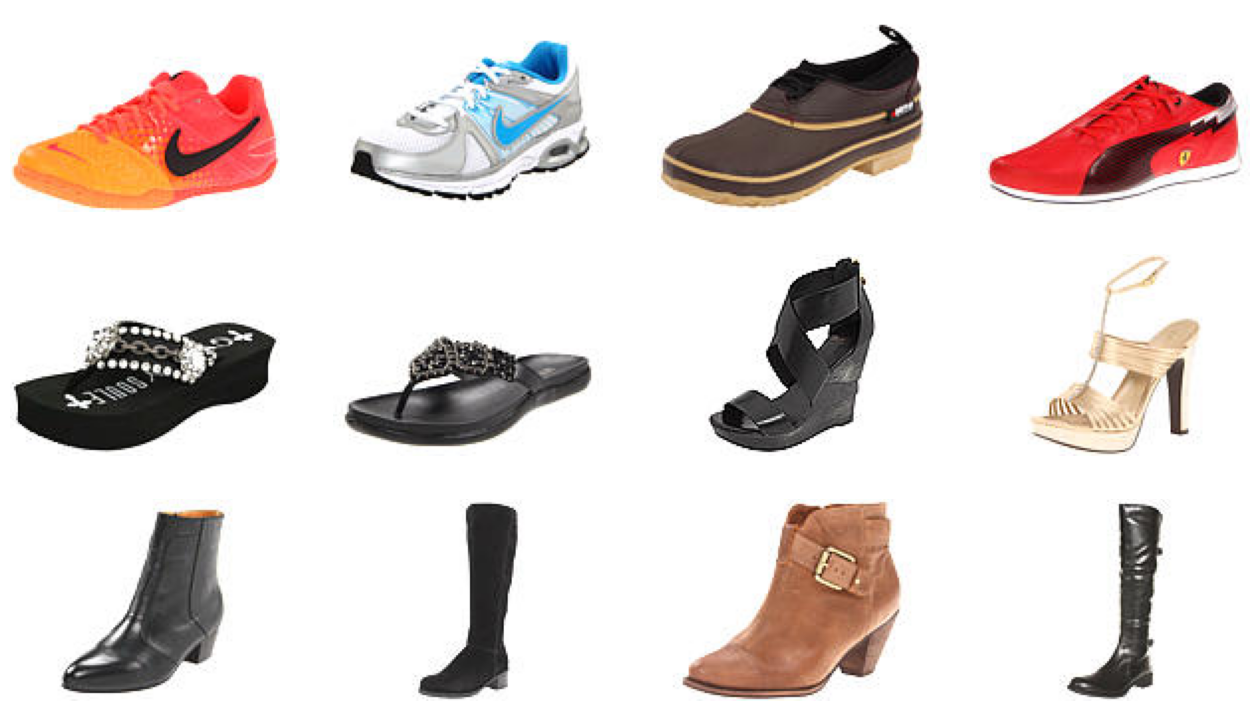

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncolomn = 4

pic_index = 0           # index awal untuk literasi gambar

fig = plt.gcf()
fig.set_size_inches(ncolomn * 4, nrows * 3)           # mengatur gambar output matplotlib dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                  # index tambah bertambah 4 setiap baris

shoe_image = [os.path.join(base_dir_shoe, fname)
                  for fname in list_dir_shoe[pic_index-4:pic_index]]
sandal_image = [os.path.join(base_dir_sandal, fname)
                  for fname in list_dir_sandal[pic_index-4:pic_index]]
boot_image = [os.path.join(base_dir_boot, fname)
                  for fname in list_dir_boot[pic_index-4:pic_index]]

for i, img_path in enumerate(shoe_image+sandal_image+boot_image) :
  sp = plt.subplot(nrows, ncolomn, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([                                              
                                                                                  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),                                           

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),                                          

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                        
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(150, (3,3), activation='relu'),                        
    tf.keras.layers.MaxPooling2D(2,2),                                            
    tf.keras.layers.Dropout(0.5),   

    tf.keras.layers.Flatten(),                                                    
                                                     
    tf.keras.layers.Dense(64, activation='relu'),                               
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])                              # Menampilkan akurasi model training

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
      train_generator,                                                          # data training hasil image generator diatas
      epochs=120,                                                               # tambahkan epoch(jumlah perulangan komputasi) jika akurasi model belum optimal
      validation_data=(valid_generator),                                        # menampilkan akurasi pengujian data validasi
      )

Epoch 1/120
188/188 [==============================] - 111s 525ms/step - loss: 0.9826 - accuracy: 0.4903 - val_loss: 0.7871 - val_accuracy: 0.6410
Epoch 2/120
 53/188 [=======>......................] - ETA: 47s - loss: 0.7821 - accuracy: 0.6297

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss values over time
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# Plot training and validation accuracies over time
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
pip install pathlib

In [ ]:
import pathlib
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
#tflite_model_file = pathlib.Path('vegs.tflite')
#tflite_model_file.write_bytes(tflite_model)
with tf.io.gfile.GFile('model_name.tflite', 'wb') as f:
    f.write(tflite_model)